In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Image Download

In [2]:
!wget https://www.sciencenews.org/wp-content/uploads/2020/03/033120_HT_covid-cat_feat-1028x579.jpg

--2021-08-23 06:42:17--  https://www.sciencenews.org/wp-content/uploads/2020/03/033120_HT_covid-cat_feat-1028x579.jpg
Resolving www.sciencenews.org (www.sciencenews.org)... 23.185.0.2, 2620:12a:8000::2
Connecting to www.sciencenews.org (www.sciencenews.org)|23.185.0.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61745 (60K) [image/jpeg]
Saving to: ‘033120_HT_covid-cat_feat-1028x579.jpg’

033120_HT_covid-cat 100%[===================>]  60.30K  --.-KB/s    in 0.001s  

2021-08-23 06:42:18 (71.0 MB/s) - ‘033120_HT_covid-cat_feat-1028x579.jpg’ saved [61745/61745]



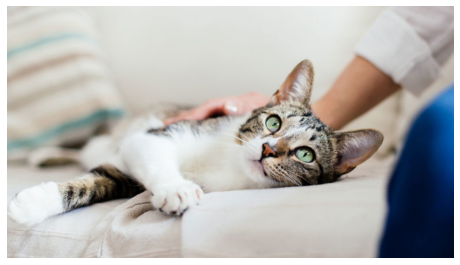

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.cvtColor(cv2.imread('033120_HT_covid-cat_feat-1028x579.jpg'), cv2.COLOR_BGR2RGB)

def show_image(image):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')

show_image(image)

### Data Augmentation using ImageDataGenerator

In [5]:
# ImageDataGenerator 객체를 인자로 입력하면
# augmentation이 적용된 일련의 image들을 시각화 해주는 함수 생성

def show_aug_image_batch(image, data_generator, n_images=4, to_int=True):
    
    # ImageDataGenerator는 여러 개의 image를 입력으로 받는다.
    # 따라서, batch를 포함한 4차원 array를 입력받도록 함.
    image_batch = np.expand_dims(image, axis=0)
    
    # ImageDataGenerator 적용.
    # fit() 후 flow()로 image batch를 넣어주어야 함.
    data_generator.fit(image_batch)
    data_gen_iter = data_generator.flow(image_batch)
    
    fig, axs = plt.subplots(nrows=1, ncols=n_images, figsize=(6*n_images, 8))
    
    for i in range(n_images):
        
        # ImageDataGenerator를 동작하기 위해서는 next()로 iteration을 호출해야함
        aug_image_batch = next(data_gen_iter)
        
        # 반환된 이미지 데이터는 batch까지 포함된 4차원 array이므로 다시 3차원 image array로 변환
        aug_image = np.squeeze(aug_image_batch)
        
        if (to_int):
            # 반환된 pixel값은 float이므로, int로 변경 후에 이미지 시각화
            aug_image = aug_image.astype('int')
            
        axs[i].imshow(aug_image)
        axs[i].axis('off')

### Horizontal Flip & Vertical Flip

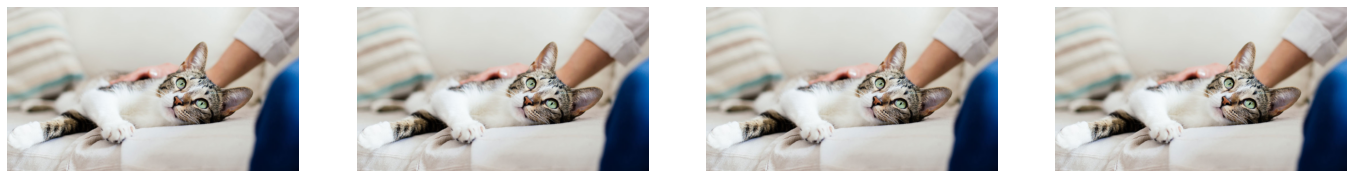

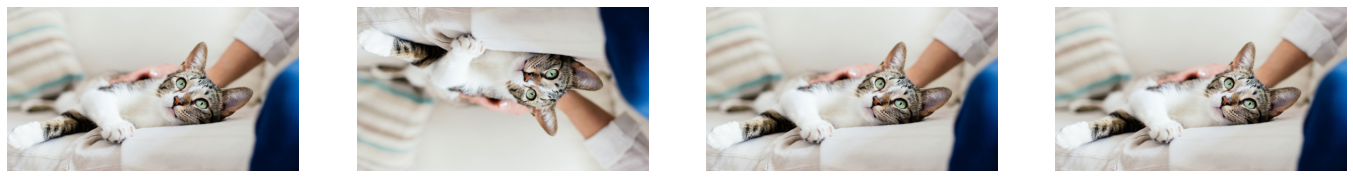

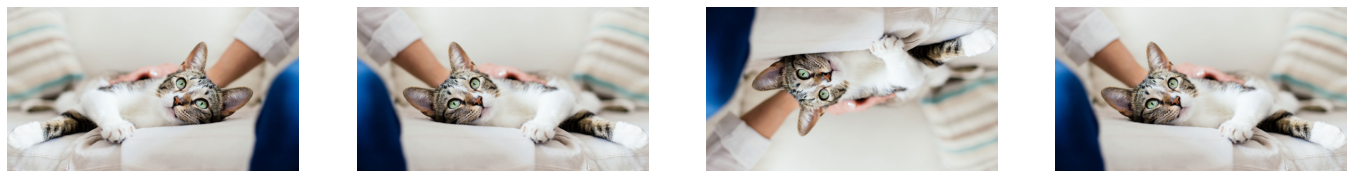

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(horizontal_flip=True)
show_aug_image_batch(image, data_generator, n_images=4)

data_generator = ImageDataGenerator(vertical_flip=True)
show_aug_image_batch(image, data_generator, n_images=4)

data_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
show_aug_image_batch(image, data_generator, n_images=4)

### Rotation

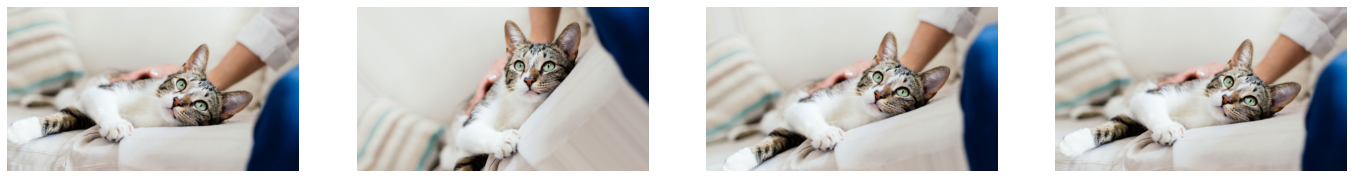

In [11]:
data_gen = ImageDataGenerator(rotation_range=45)
show_aug_image_batch(image, data_gen, n_images=4)

### Shift
- width_shift
- height_shift
- fillmode
    - nearest
    - reflect
    - wrap
    - constant/cval

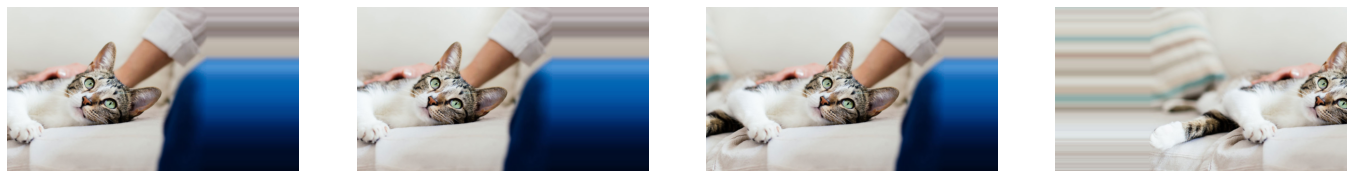

In [12]:
data_generator = ImageDataGenerator(width_shift_range=0.4)
show_aug_image_batch(image, data_generator, n_images=4)

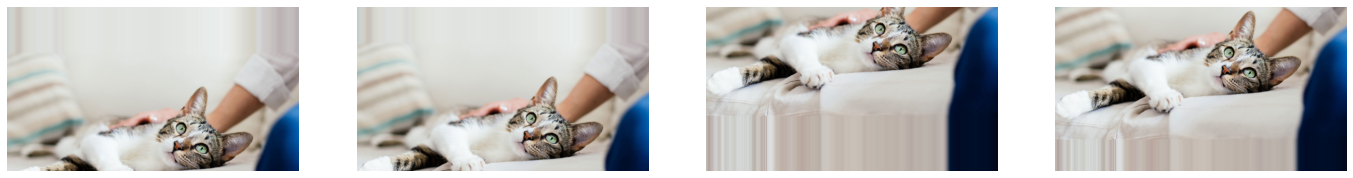

In [13]:
data_generator = ImageDataGenerator(height_shift_range=0.4)
show_aug_image_batch(image, data_generator, n_images=4)

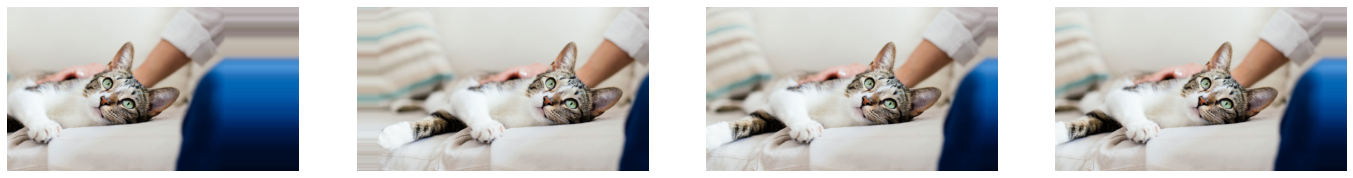

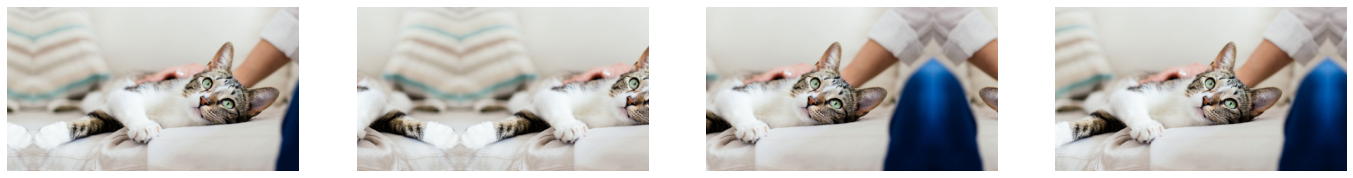

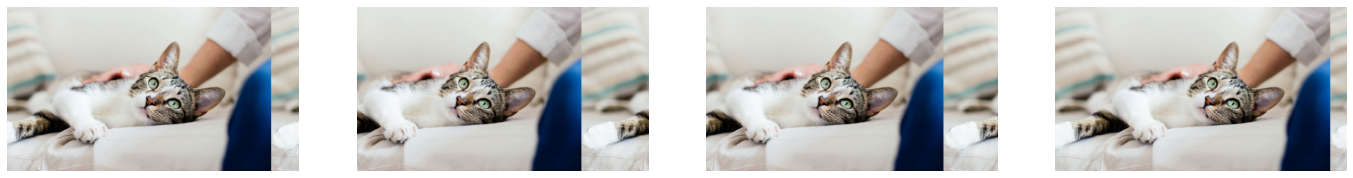

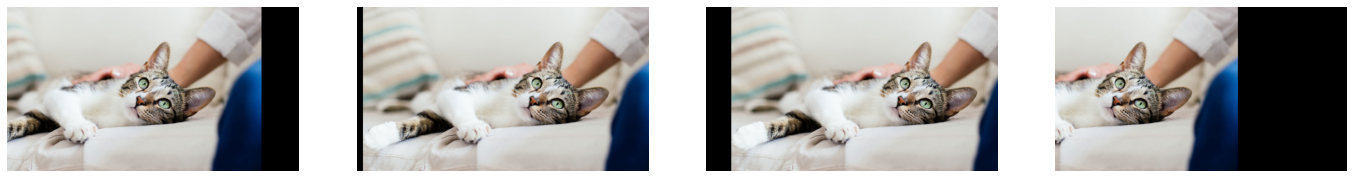

In [19]:
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='nearest')
show_aug_image_batch(image, data_generator, n_images=4)

data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='reflect')
show_aug_image_batch(image, data_generator, n_images=4)

data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='wrap')
show_aug_image_batch(image, data_generator, n_images=4)

data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='constant', cval=0)
show_aug_image_batch(image, data_generator, n_images=4)

### Zoom(Scale)

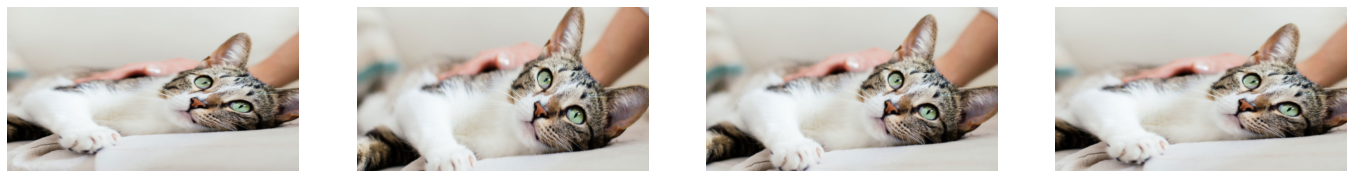

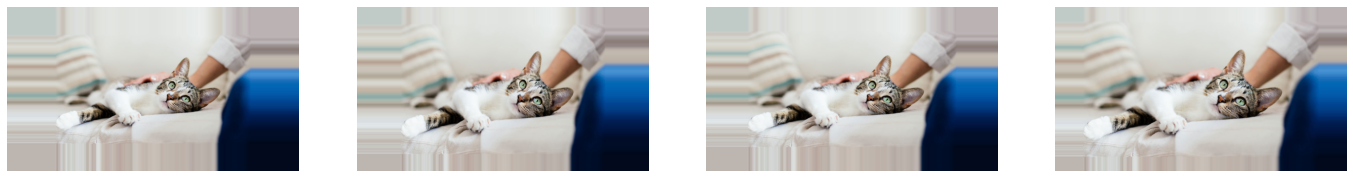

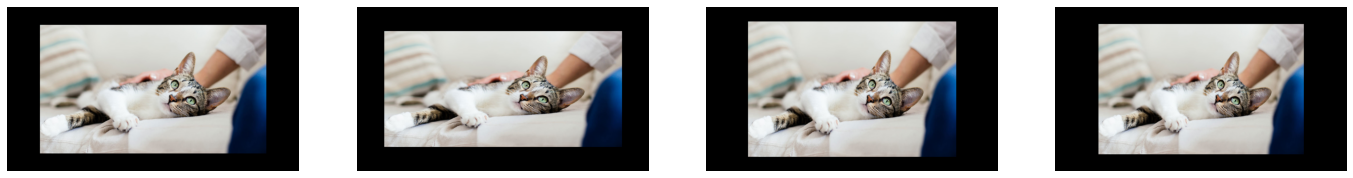

In [22]:
data_generator = ImageDataGenerator(zoom_range=[0.5, 0.9])
show_aug_image_batch(image, data_generator, n_images=4)

data_generator = ImageDataGenerator(zoom_range=[1.1 ,1.5])
show_aug_image_batch(image, data_generator, n_images=4)

data_generator = ImageDataGenerator(zoom_range=[1.1 ,1.5], fill_mode='constant', cval=0)
show_aug_image_batch(image, data_generator, n_images=4)

### Shear

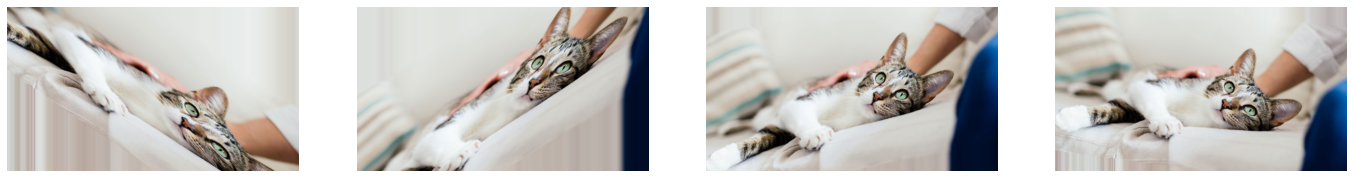

In [23]:
data_generator = ImageDataGenerator(shear_range=45)
show_aug_image_batch(image, data_generator, n_images=4)

### Bright

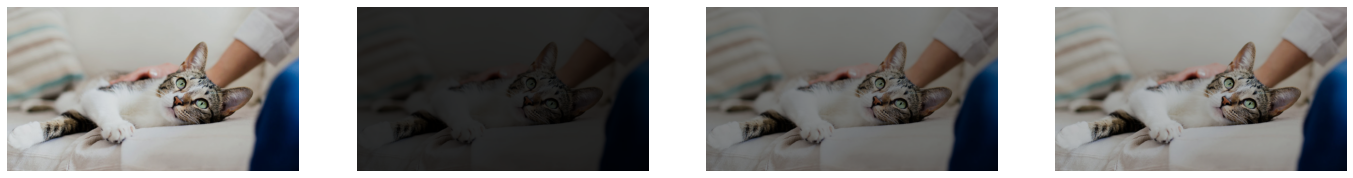

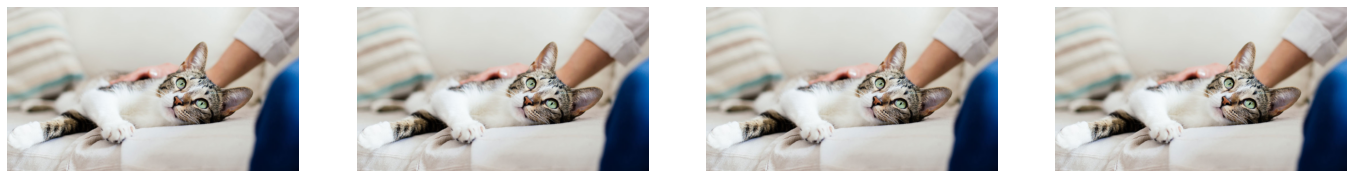

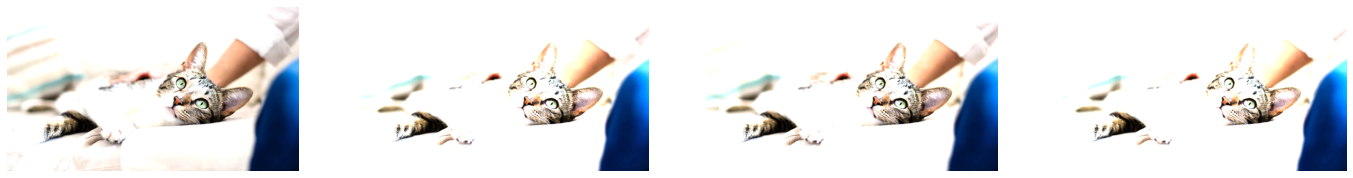

In [26]:
data_generator = ImageDataGenerator(brightness_range=(0.1, 0.9))
show_aug_image_batch(image, data_generator, n_images=4)

data_generator = ImageDataGenerator(brightness_range=(1.0, 1.0))
show_aug_image_batch(image, data_generator, n_images=4)

data_generator = ImageDataGenerator(brightness_range=(1.0, 2.0))
show_aug_image_batch(image, data_generator, n_images=4)

### Channel shift

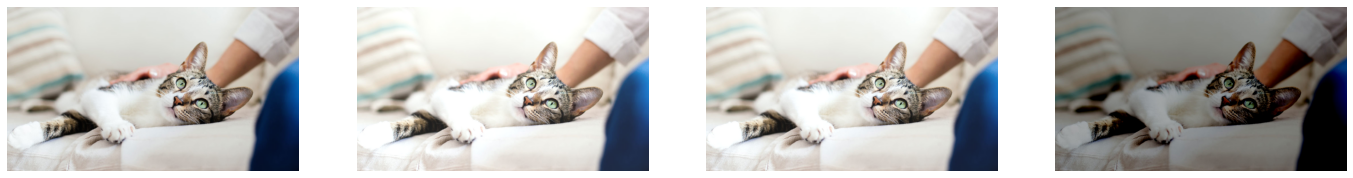

In [27]:
data_generator = ImageDataGenerator(channel_shift_range=150.0)
show_aug_image_batch(image, data_generator, n_images=4)

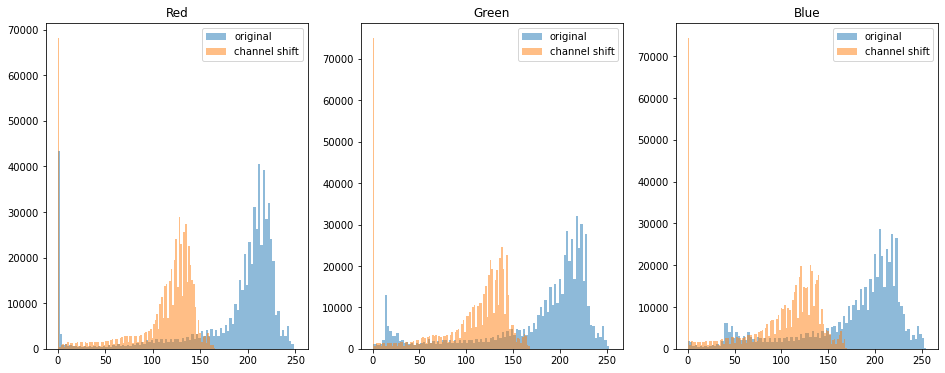

In [29]:
def get_aug_image(image, data_generator):
    
    image_batch = np.expand_dims(image, axis=0)
    
    data_generator.fit(image_batch)
    data_gen_iter = data_generator.flow(image_batch)
    
    aug_image_batch = next(data_gen_iter)
    
    aug_image = np.squeeze(aug_image_batch)
    
    aug_image = aug_image
    
    return aug_image

data_generator = ImageDataGenerator(channel_shift_range=150.0)
aug_image = get_aug_image(image, data_generator)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

for i in range(3):
    
    axs[i].hist(image[:, :, i].flatten(), bins=100, alpha=0.5, label='original')
    axs[i].hist(aug_image[:, :, i].flatten(), bins=100, alpha=0.5, label='channel shift')
    axs[i].legend(loc='upper right')
    
    if i == 0:
        title_str = 'Red'
    elif i == 1:
        title_str = 'Green'
    else:
        title_str = 'Blue'
    
    axs[i].set(title=title_str)
    

### Normalization

In [33]:
r_mean = np.mean(image[:, :, 0])
g_mean = np.mean(image[:, :, 1])
b_mean = np.mean(image[:, :, 2])

r_std = np.std(image[:, :, 0])
g_std = np.std(image[:, :, 1])
b_std = np.std(image[:, :, 2])

print(r_mean, g_mean, b_mean)
print(r_std, g_std, b_std)

r_zscore = (image[:, :, 0] - r_mean) / r_std
g_zscore = (image[:, :, 1] - g_mean) / g_std
b_zscore = (image[:, :, 2] - b_mean) / b_std

# print(r_zscore, g_zscore, b_zscore)

178.1461227260203 176.28255646727553 173.6606738439413
65.90277949962356 62.48317182871674 57.52425459226215


In [34]:
data_generator = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
image_batch = np.expand_dims(image, axis=0)

data_generator.fit(image_batch)
print(data_generator.mean, data_generator.std)

[[[178.0238  176.30089 173.7162 ]]] [[[65.88598  62.47825  57.526283]]]


In [35]:
data_generator = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
image_batch = np.expand_dims(image, axis=0)

data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch)

aug_image_batch = next(data_gen_iter)

aug_image = np.squeeze(aug_image_batch)
aug_image

array([[[ 0.21212701,  0.42733452,  0.43951732],
        [ 0.22730476,  0.4433401 ,  0.4569007 ],
        [ 0.2424825 ,  0.45934564,  0.47428405],
        ...,
        [ 0.13623834,  0.02719526,  0.09185016],
        [ 0.13623834,  0.02719526,  0.09185016],
        [ 0.13623834,  0.02719526,  0.09185016]],

       [[ 0.22730476,  0.4433401 ,  0.4569007 ],
        [ 0.2424825 ,  0.45934564,  0.47428405],
        [ 0.25766024,  0.4433401 ,  0.47428405],
        ...,
        [ 0.13623834,  0.02719526,  0.09185016],
        [ 0.13623834,  0.02719526,  0.09185016],
        [ 0.13623834,  0.02719526,  0.09185016]],

       [[ 0.2424825 ,  0.45934564,  0.47428405],
        [ 0.27283797,  0.45934564,  0.4916674 ],
        [ 0.2880157 ,  0.4753512 ,  0.5090508 ],
        ...,
        [ 0.13623834,  0.02719526,  0.09185016],
        [ 0.13623834,  0.02719526,  0.09185016],
        [ 0.13623834,  0.02719526,  0.09185016]],

       ...,

       [[ 0.22730476,  0.15523982,  0.10923351],
        [ 0

In [36]:
data_generator = ImageDataGenerator(rescale=1/255.0)
aug_image = get_aug_image(image, data_generator)
print(aug_image)

[[[0.75294125 0.7960785  0.7803922 ]
  [0.7568628  0.8000001  0.7843138 ]
  [0.7607844  0.80392164 0.78823537]
  ...
  [0.73333335 0.69803923 0.7019608 ]
  [0.73333335 0.69803923 0.7019608 ]
  [0.73333335 0.69803923 0.7019608 ]]

 [[0.7568628  0.8000001  0.7843138 ]
  [0.7607844  0.80392164 0.78823537]
  [0.76470596 0.8000001  0.78823537]
  ...
  [0.73333335 0.69803923 0.7019608 ]
  [0.73333335 0.69803923 0.7019608 ]
  [0.73333335 0.69803923 0.7019608 ]]

 [[0.7607844  0.80392164 0.78823537]
  [0.7686275  0.80392164 0.79215693]
  [0.7725491  0.8078432  0.7960785 ]
  ...
  [0.73333335 0.69803923 0.7019608 ]
  [0.73333335 0.69803923 0.7019608 ]
  [0.73333335 0.69803923 0.7019608 ]]

 ...

 [[0.7568628  0.7294118  0.7058824 ]
  [0.7686275  0.7411765  0.7176471 ]
  [0.7137255  0.6784314  0.65882355]
  ...
  [0.00784314 0.03529412 0.10980393]
  [0.00784314 0.03529412 0.10980393]
  [0.00784314 0.03529412 0.10980393]]

 [[0.72156864 0.69411767 0.67058825]
  [0.7411765  0.7137255  0.6901961 ]


### Putting all together

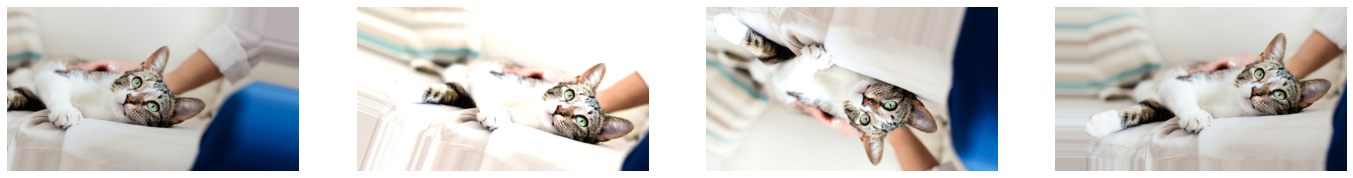

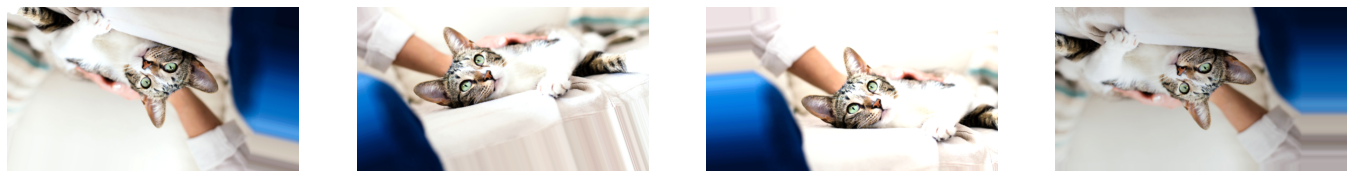

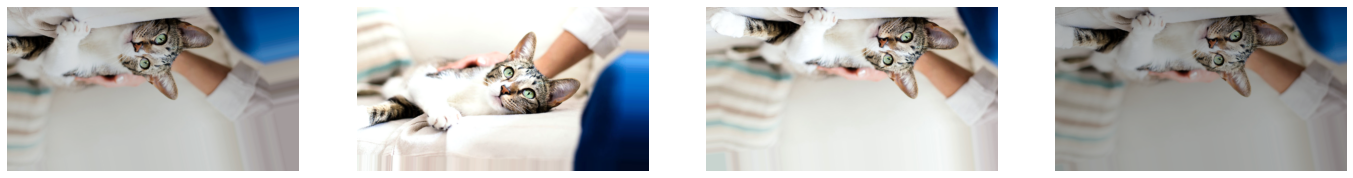

In [37]:
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.7, 1.3),
    horizontal_flip=True,
    vertical_flip=True
    # rescale=1/255.0
)

for i in range(3):
    show_aug_image_batch(image, data_generator, n_images=4)